# Data science & Business Analytics- GRIPFEB2021
### Submitted by: Abhishek kumar
### Task - 1 :Prediction using supervise Machine Learning

In [1]:
# Importing Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Importing Dataset

In [2]:
df=pd.read_csv('http://bit.ly/w-data')
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Preprocessing of dataset

In [4]:
df.shape

(25, 2)

In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Visualisation of data for accurate analysis and prediction

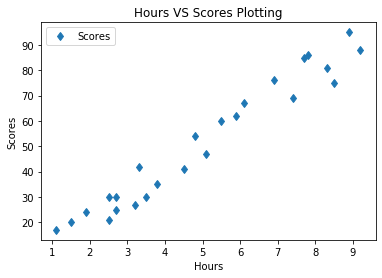

In [7]:
df.plot(x='Hours',y='Scores',style="d")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours VS Scores Plotting")
plt.show()

In [8]:
x=df.iloc[:,:-1]
y=df.iloc[:,1]

#### Splitting of dataset into training and testing part and train the module using linear regression

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


In [10]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
from sklearn.feature_selection import SelectFromModel
pd.DataFrame(reg.coef_,x.columns,columns=['Coeff'])

,Coeff
Hours,9.788567


In [12]:
print(reg.intercept_)

2.370815382341881


#### Visualisation of best fit line of regression

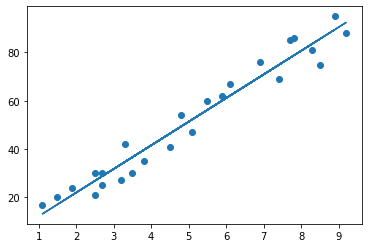

In [13]:
line=reg.coef_*x+reg.intercept_
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

In [14]:
print(x_test)

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9
22    3.8
17    1.9
24    7.8


In [15]:
prediction=reg.predict(x_test)

#### Actual and predicted score is given below

In [16]:
pred=pd.DataFrame({'Actual Score':y_test,'predicted Score':prediction})
pred.head()

,Actual Score,predicted Score
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359


#### Training and test score given below

In [17]:
print("training score: ",reg.score(x_train,y_train))
print("test score :",reg.score(x_test,y_test))

training score:  0.9484997422695115
test score : 0.9568211104435257


#### Now prediction using our own input and find out predicted score

In [18]:
hours=9.25
test=np.array([hours])
test=test.reshape([-1,1])
own_pred=reg.predict(test)
print("no.of hours={}".format(hours))
print("predicted score={}".format(own_pred[0]))

no.of hours=9.25
predicted score=92.91505723477056


#### Now evaluating the performance of algorithm by find out different types of errors.

In [19]:
from sklearn import metrics
print('Mean absolute errors:',metrics.mean_absolute_error(y_test, prediction))
print('Mean square errors:',metrics.mean_squared_error(y_test, prediction))
print('Root mean square errors:',np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('R-2 :',metrics.r2_score(y_test,prediction))

Mean absolute errors: 4.419727808027652
Mean square errors: 22.96509721270043
Root mean square errors: 4.792191274636315
R-2 : 0.9568211104435257
